# STA130 HOMEWORK WEEK 3
The first part of this is the code from the tutorial. The homework will start below.

In [68]:
import pandas as pd 
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [69]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


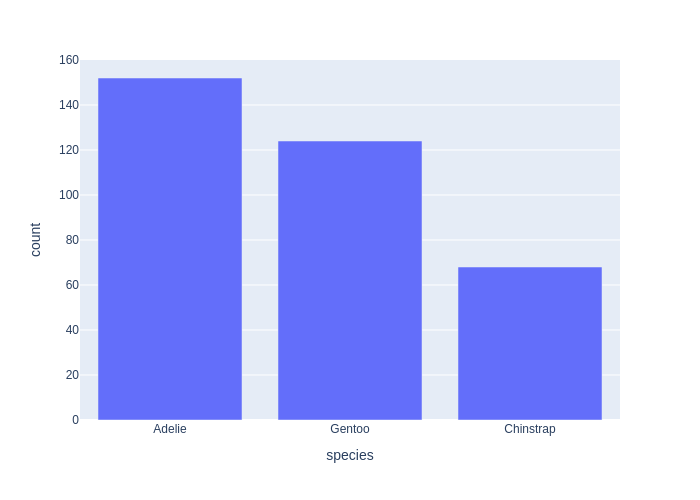

In [70]:
import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Canada'")
#fig = px.bar(data_canada, x='year', y='pop')

# OOPS! This needs an x-position and a y-height value!
fig = px.bar(penguins.species.value_counts().reset_index(), x='species', y='count')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# So what is this showing? 
# (And below we show what the `pingees.species.value_counts().reset_index()` "trick" is)

In [71]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [72]:
penguins.species.value_counts().reset_index()

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


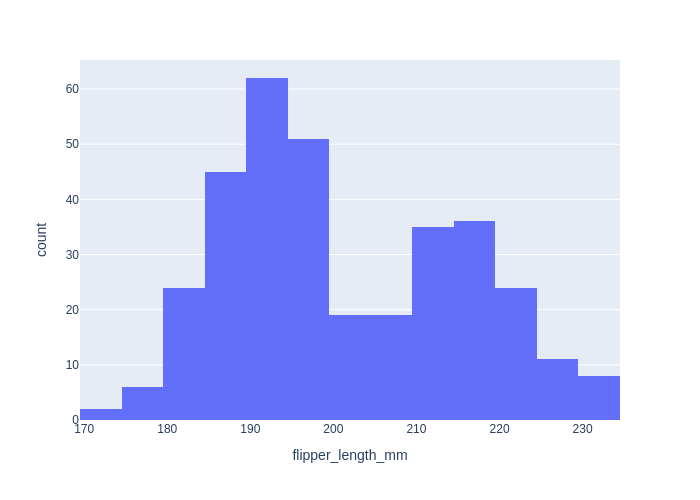

In [92]:
fig = px.histogram(penguins, x="flipper_length_mm")
fig.show(renderer='png')

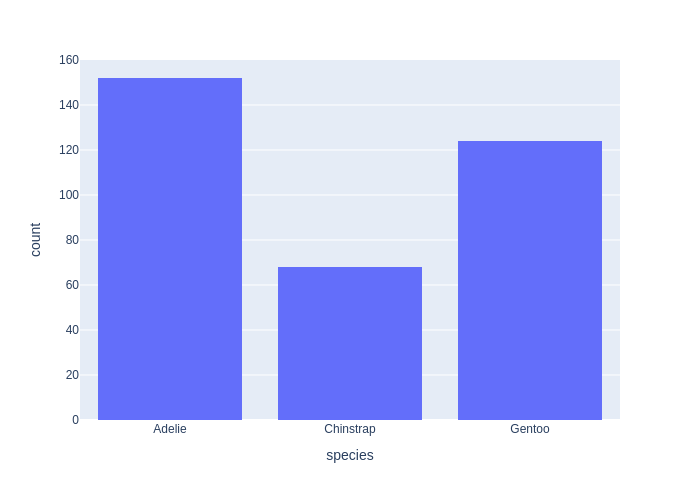

In [93]:
fig = px.histogram(penguins, x="species")
fig.show(renderer='png')

In [75]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

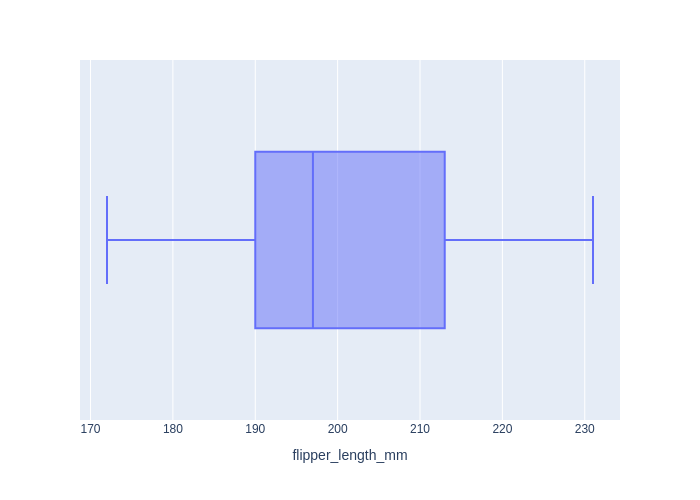

In [76]:
#import plotly.express as px
#df = px.data.tips()
#fig = px.box(df, x="total_bill")
fig = px.box(penguins , x="flipper_length_mm") # or change orientation by using "y"
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# How does this compare to the alternative histogram presentation of this data?

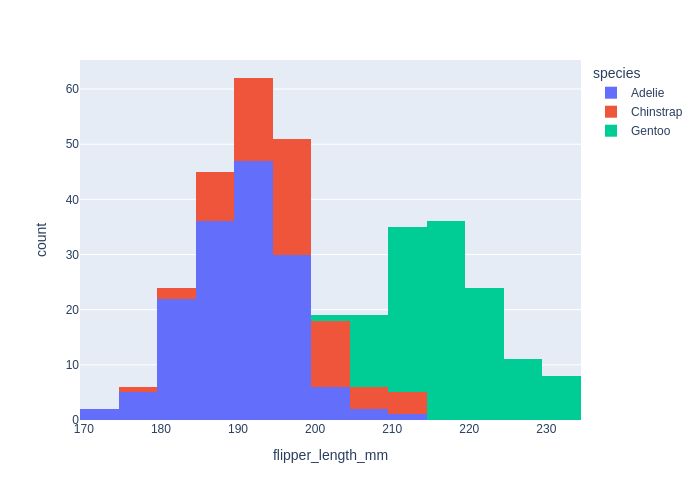

In [77]:
# You have to look farther into the plotly histogram documention
# but if you scroll a little bit you can find this

#import plotly.express as px
#df = px.data.tips()
#fig = px.histogram(df, x="total_bill", color="sex")
fig = px.histogram(penguins, color="species", x="flipper_length_mm")
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Does this help explain things?

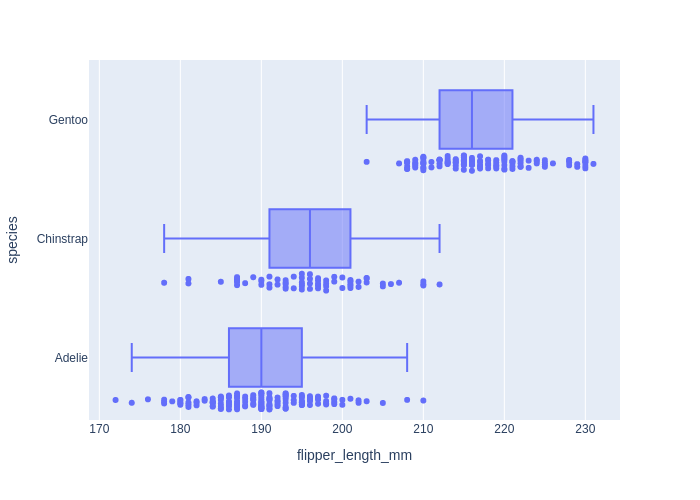

In [78]:
# And if you look just a little farther back in the plotly box plot documention
# you can find this... just a little bit down

#import plotly.express as px
#df = px.data.tips()
fig = px.box(penguins, y="species", x="flipper_length_mm", points="all")
fig.show(renderer='png')#renderer="png")

# Do you like this better? If so, why?

# STA130 ACTUAL HOMEWORK

Question #1

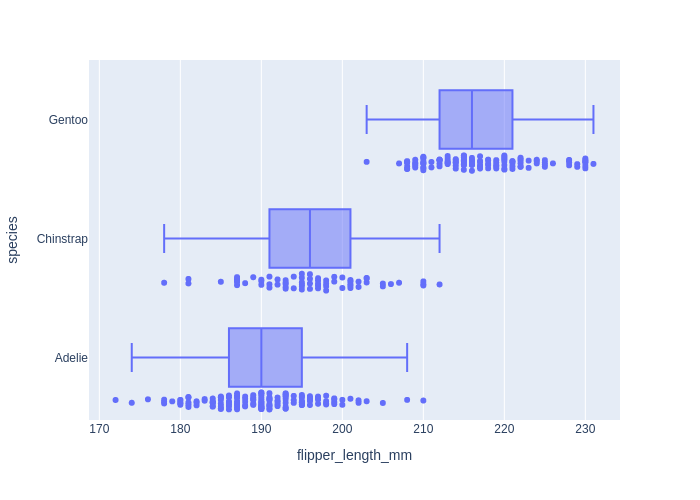

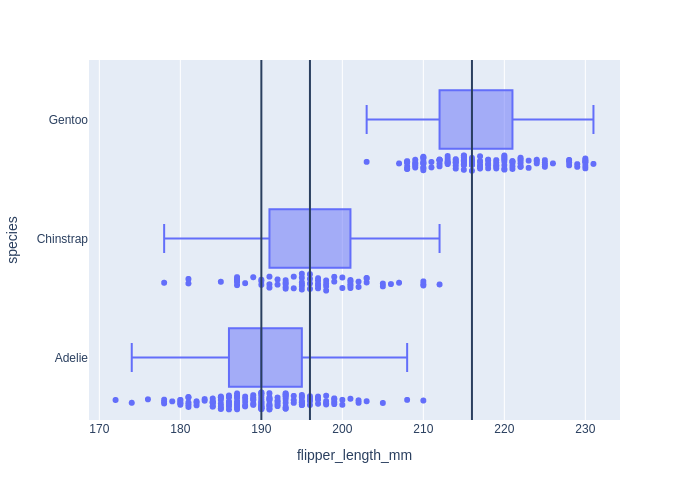

In [94]:
# And if you look just a little farther back in the plotly box plot documention
# you can find this... just a little bit down

#import plotly.express as px
#df = px.data.tips()
fig = px.box(penguins, y="species", x="flipper_length_mm", points="all")
fig.show(renderer="png")
fig.add_vline(190)
fig.add_vline(196)
fig.add_vline(216)
fig.show(renderer="png")

# Do you like this better? If so, why?

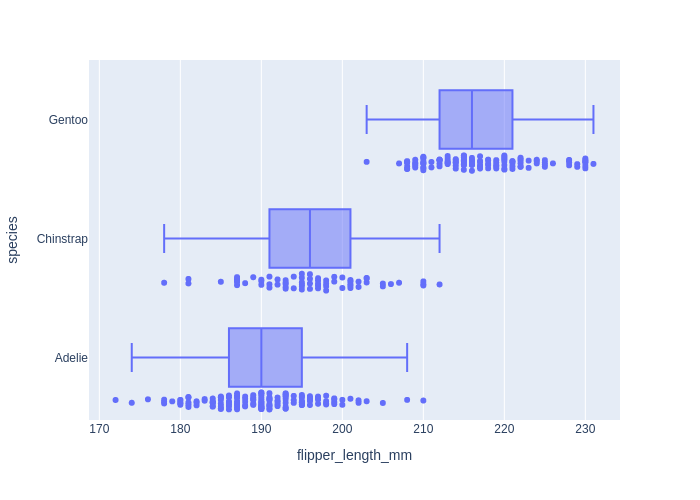

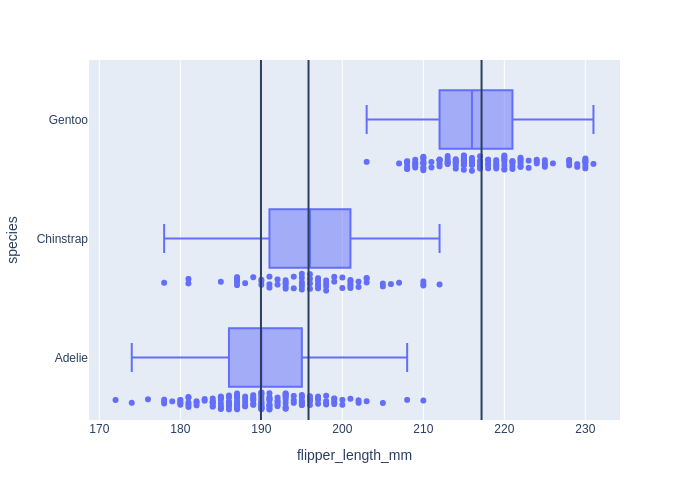

In [80]:
import plotly.express as px
import pandas as pd

# Load the penguins dataset (assuming it's already available in a DataFrame)
# penguins = px.data.penguins()  # Uncomment if you need to load the penguins dataset

# Calculate the mean flipper length for each species
means = penguins.groupby('species')['flipper_length_mm'].mean()

# Create the box plot
fig = px.box(penguins, y="species", x="flipper_length_mm", points="all")
fig.show(renderer="png")

# Add vertical lines for each species mean
for mean in means:
    fig.add_vline(x=mean)

fig.show(renderer="png")


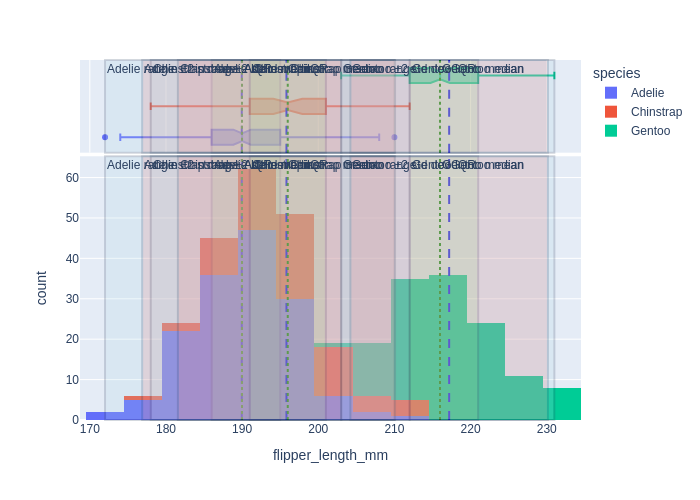

In [81]:
import plotly.express as px
import pandas as pd

# Create the histogram plot
fig = px.histogram(penguins, x="flipper_length_mm", color="species", marginal="box")

# For each species, calculate the required statistics
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min_value='min',
    max_value='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)

# Add vertical lines for the mean and median for each species
for species, stats in species_stats.iterrows():
    fig.add_vline(x=stats['mean'], line_dash="dash", line_color="blue", annotation_text=f"{species} mean")
    fig.add_vline(x=stats['median'], line_dash="dot", line_color="green", annotation_text=f"{species} median")

    # Add vertical shaded regions for the range (min to max)
    fig.add_vrect(x0=stats['min_value'], x1=stats['max_value'], fillcolor="lightblue", opacity=0.2, 
                  annotation_text=f"{species} range", annotation_position="top left")

    # Add vertical shaded regions for the interquartile range (Q1 to Q3)
    fig.add_vrect(x0=stats['q1'], x1=stats['q3'], fillcolor="lightgreen", opacity=0.2, 
                  annotation_text=f"{species} IQR", annotation_position="top left")

    # Add vertical shaded regions for ±2 standard deviations from the mean
    fig.add_vrect(x0=stats['mean'] - 2 * stats['std'], x1=stats['mean'] + 2 * stats['std'], 
                  fillcolor="lightcoral", opacity=0.2, 
                  annotation_text=f"{species} ±2 std dev", annotation_position="top left")

# Show the plot
fig.show(renderer="png")


QUESTION #2

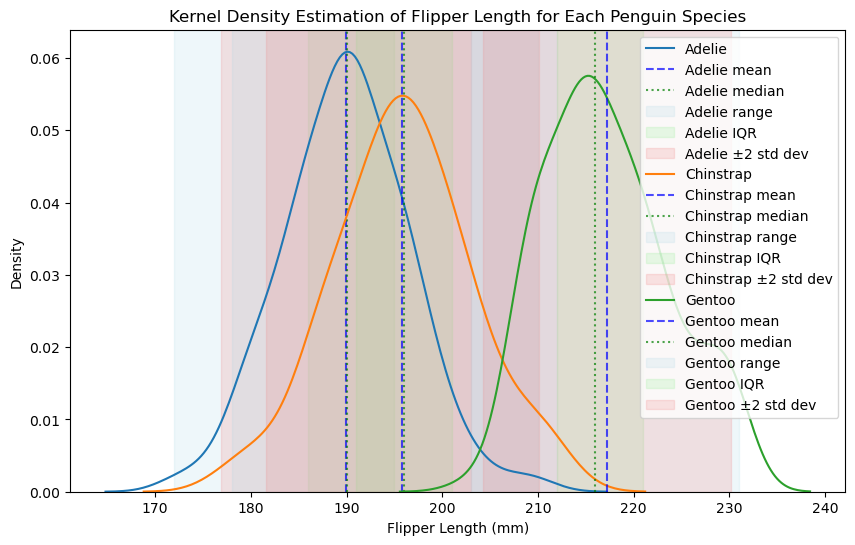

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the penguins dataset is already loaded into a DataFrame
# penguins = sns.load_dataset('penguins')  # Uncomment if you need to load the penguins dataset

# For each species, calculate the necessary statistics
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min_value='min',
    max_value='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)

# Create a seaborn figure with KDE plots
plt.figure(figsize=(10, 6))

# Create a KDE plot for each species
for species in penguins['species'].unique():
    sns.kdeplot(data=penguins[penguins['species'] == species], x='flipper_length_mm', label=species)
    
    # Extract the statistics for this species
    stats = species_stats.loc[species]
    
    # Add vertical lines for the mean and median
    plt.axvline(stats['mean'], color='blue', linestyle='--', label=f"{species} mean", alpha=0.7)
    plt.axvline(stats['median'], color='green', linestyle=':', label=f"{species} median", alpha=0.7)
    
    # Add shaded regions for the range (min to max)
    plt.axvspan(stats['min_value'], stats['max_value'], color='lightblue', alpha=0.2, label=f"{species} range")
    
    # Add shaded regions for the interquartile range (Q1 to Q3)
    plt.axvspan(stats['q1'], stats['q3'], color='lightgreen', alpha=0.2, label=f"{species} IQR")
    
    # Add shaded regions for ±2 standard deviations from the mean
    plt.axvspan(stats['mean'] - 2 * stats['std'], stats['mean'] + 2 * stats['std'], 
                color='lightcoral', alpha=0.2, label=f"{species} ±2 std dev")

# Labeling the plot
plt.title('Kernel Density Estimation of Flipper Length for Each Penguin Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Density')

# Display the legend, but avoid label duplication by using a trick to remove duplicate entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

# Show the plot
plt.show()


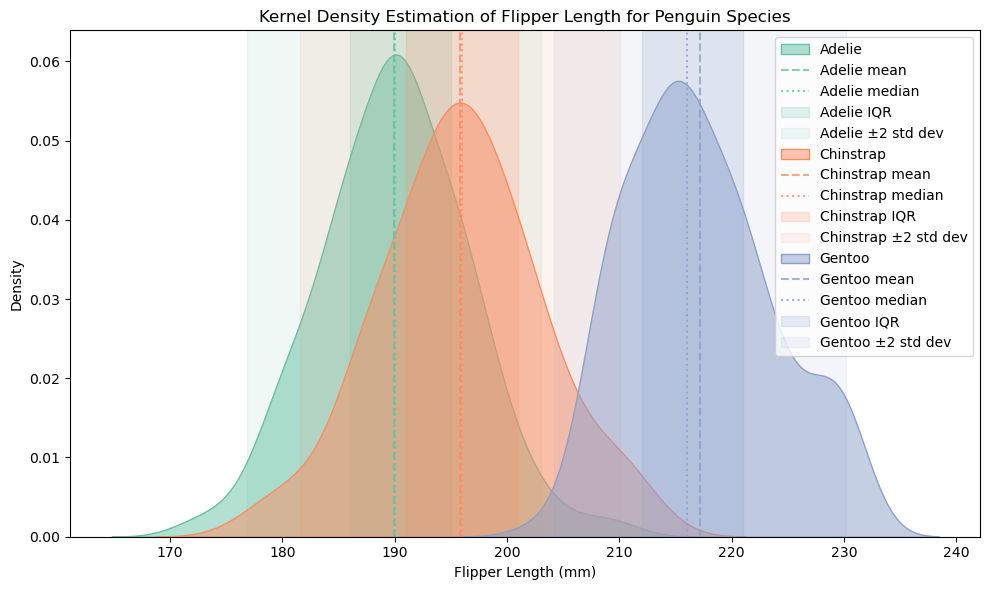

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset (assuming it's already available in a DataFrame)
# penguins = sns.load_dataset('penguins')  # Uncomment if needed to load the dataset

# Define a color palette (example: pastel-like colors)
palette = sns.color_palette("Set2", n_colors=len(penguins['species'].unique()))

# For each species, calculate the necessary statistics
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min_value='min',
    max_value='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)

# Create a Seaborn figure with KDE plots
fig, ax = plt.subplots(figsize=(10, 6))

# Function to get colors for each species
def get_species_color(species):
    species_list = penguins['species'].unique()
    return palette[list(species_list).index(species)]

# Generate KDE plots and overlay statistics
for species in penguins['species'].unique():
    species_color = get_species_color(species)
    
    # KDE plot for each species
    sns.kdeplot(data=penguins[penguins['species'] == species], 
                x='flipper_length_mm', label=species, ax=ax, 
                color=species_color, fill=True, alpha=0.5)
    
    # Extract the statistics for this species
    stats = species_stats.loc[species]
    
    # Add vertical lines for the mean and median
    ax.axvline(stats['mean'], color=species_color, linestyle='--', label=f"{species} mean", alpha=0.8)
    ax.axvline(stats['median'], color=species_color, linestyle=':', label=f"{species} median", alpha=0.8)
    
    # Add shaded regions for the interquartile range (Q1 to Q3)
    ax.axvspan(stats['q1'], stats['q3'], color=species_color, alpha=0.2, label=f"{species} IQR")
    
    # Add shaded regions for ±2 standard deviations from the mean
    ax.axvspan(stats['mean'] - 2 * stats['std'], stats['mean'] + 2 * stats['std'], 
                color=species_color, alpha=0.1, label=f"{species} ±2 std dev")

# Set the title, labels, and legend
ax.set_title('Kernel Density Estimation of Flipper Length for Penguin Species')
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Density')

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


3) https://chatgpt.com/share/66f5f849-a588-8002-9df3-8f458379015b

Certainly! Here’s a summary of our conversation:

Data Visualization Preferences:
You expressed that histograms are the most familiar and visually intuitive representation for you when working with the penguins dataset.
Comparison of Visualization Methods:
We discussed the differences between three visualization methods: box plots, histograms, and kernel density estimates (KDEs).
Histograms: Easy to interpret, familiar, and effective for showing frequency distributions but can be sensitive to bin selection and lose individual data points.
Box Plots: Provide concise summaries of key statistics (median, quartiles, outliers), allowing for good comparisons across groups but can be confusing for novices and lack detail on data distribution.
KDEs: Offer a smooth, detailed view of the data distribution, highlighting trends and multimodality, but can be challenging to interpret and sensitive to bandwidth selection.
Dot Plots: You mentioned encountering dot plots and expressed some confusion about them.
KDE Explanation: I provided a detailed explanation of KDE, highlighting how it works by estimating probability density, the role of bandwidth, and how it compares to histograms in representing data distribution.
Pros and Cons: We summarized the pros and cons of box plots, histograms, and KDEs to help understand their strengths and limitations in visualizing data.
Overall, we explored the effectiveness and usability of different data visualization methods in relation to the penguins dataset, focusing on their interpretation and presentation for individuals with varying levels of statistical knowledge. If you need any further details or have more questions, feel free to ask!

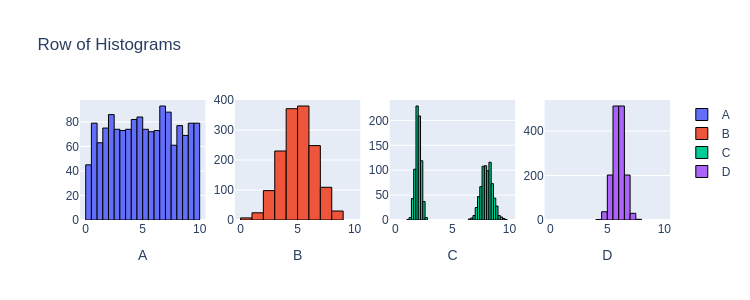

In [84]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4)
4.1) From my understanding of means and variances, it appears that samples A, B and D will all have means at around the area of x=5. Visually, it appears that sample D will have a mean on the higher end (likely at 6). In the case of C, whilst there are no values directly in the mean range of 5, there is a high concentration of values on either side of the mean.

As for sample variances, B and D both have similar sample variances as all of their data is concentrated into a relatively small range. However, D's standard deviation is still going to be significantly lower. As for A and C, A will likely have a high standard deviation as many of the categories are right beside eachother at nearly equal quantities. Whereas for C, the standard deviation stands to be quite high as well.

4.2) For having similar means and astoundingly different variances, samples C, B and A can be looked at.

In the case of sample A, the variance is very high because data is very evenly distributed. There is no single value with astoundingly more entries than the others. Compared to sample B, where the variance is very low as almost all the data is at the x=5 point. Lastly, sample C has an even higher variance than sample A, as its data is separated by a large canyon in the middle.

4.3 ) As for having similar variances but different means:

I will take a look at data B and data D. As mentioned before, the variances for the two are relatively similar, with both sitting at having almost all of their data conglomerated into a single small range. However, as mentioned before, the mean for B is around 5, whereas for D, it is likely around 6. The variance has very little to play in this, as it does not consider where the data is centralized ON, simply how much deviation there is between the data entries.

4.4) As for having different means and different variances, I would like to use Data A and Data D.

In data A, the variance is very high and the mean is likely around the midpoint of it, at around x=5.
In data D, the variance is very low, with almost all of the values being centred at a single small range. In the case of D, as mentioned before, the mean is likely higher than the others, sitting at a likely x=6.

# POST LECTURE HOMEWORK

5) CHATBOT SUMMARY https://chatgpt.com/share/66f5fe44-cfcc-8002-a196-dae0aa133a63

In this conversation, we explored the relationship between the mean and the median, focusing on how skewness affects their values in different distributions:

Mean is the average of the data, and median is the middle value when data is ordered.
In a symmetric distribution, the mean and median are roughly equal.
In a positively skewed (right-skewed) distribution, the mean is greater than the median.
In a negatively skewed (left-skewed) distribution, the mean is less than the median.
We also discussed that skewness reflects the asymmetry of data, and the mean is more affected by extreme values, while the median remains a more stable measure of central tendency in skewed distributions.

5) My summary

The relationship between the mean and the median is one which depends on the skewness of the data. In a perfectly non skewed, centred function, the mean and the median would be the same as the centre of the data would also be the midpoint of the data. However, in the case of any skewed data, this shifts it. If the data is skewed to the right, it would mean that there is a longer tail of values on the right, but there are still heavy amounts of values on the left. In this case, the mean will be higher than the median as the sum of all the data divided by the number of the data is still to the left, but the midpoint of the data will still be somewhere to the right of that.

On the contrary, if the data is skewed to the left, we can expect effectively the opposite. In this case, there are a lot more data values on the left side in the form of a tail, shifting the median towards the right. However, when calculating the mean, we see that the number of values on the right overpowers the number of values on the left, meaning the median is greater than the mean.

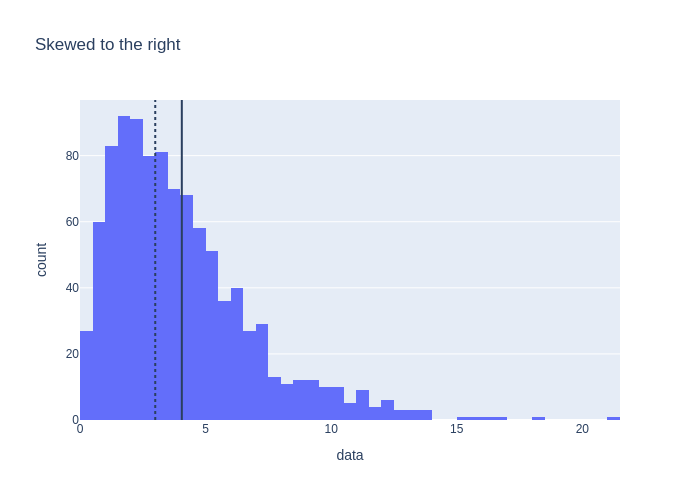

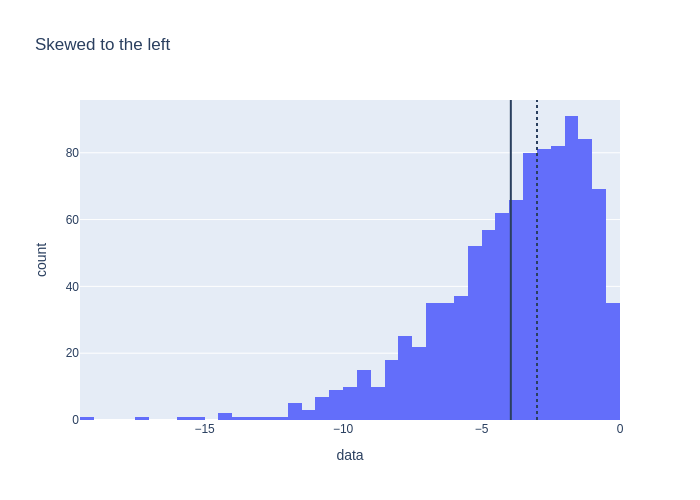

In [85]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title='Skewed to the right')
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1.add_vline(sample1.mean())
fig1.add_vline(int(np.quantile(sample1, [0.5])), line_dash='dot')
fig1.show(renderer='png')

fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title='Skewed to the left')
fig2.add_vline(sample2.mean())
fig2.add_vline(int(np.quantile(sample2, [0.5])), line_dash='dot')
fig2.show(renderer='png')

# Let the dotted line represent the median.

#6 As a lactose intolerant person, upon seeing the dataset about cheeses, I had no choice but to choose this one.

In [86]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv")
df # df.columns

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Sveciaost,https://www.cheese.com/sveciaost/,cow,Sweden,Low-laying regions,NaN,"semi-hard, brined",45%,NaN,"creamy, supple",rindless,pale yellow,acidic,NaN,False,False,NaN,NaN,NaN
1183,Swag,https://www.cheese.com/swag/,goat,Australia,South Australia,NaN,"fresh firm, artisan",NaN,NaN,"creamy, crumbly",ash coated,white,"acidic, creamy",fresh,True,False,NaN,NaN,Woodside Cheese Wrights
1184,Swaledale,https://www.cheese.com/swaledale/,sheep,England,"Swaledale, North Yorkshire",NaN,hard,NaN,NaN,semi firm,NaN,yellow,"smooth, sweet",floral,True,False,Swaledale Sheep Cheese,NaN,NaN
1185,Sweet Style Swiss,https://www.cheese.com/sweet-style-swiss/,NaN,Switzerland,NaN,NaN,"semi-hard, artisan",NaN,NaN,"firm, supple",waxed,NaN,nutty,"nutty, sweet",False,False,NaN,NaN,NaN


Using a simple data table, I converted the final column (the yellowness of the cheese) into a list of integers, with the higher the number being the yellower the cheese. Furthermore, similarly to the penguins dataset, I chose to treat the countries like species of cheese.

In [87]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv")

cheese_color_index = {
    "white": 0,
    "ivory": 1,
    "pale yellow": 2,
}

df = df[df['color'].notna()]

df['color'] = df['color'].map(cheese_color_index)

df[df['color'].notna()]


,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,1.0,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,0.0,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,0.0,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN
5,Abbaye de Timadeuc,https://www.cheese.com/abbaye-de-timadeuc/,cow,France,province of Brittany,NaN,semi-hard,NaN,NaN,soft,washed,2.0,"salty, smooth",nutty,False,False,NaN,NaN,Abbaye Cistercienne NOTRE-DAME DE TIMADEUC
6,Abbaye du Mont des Cats,https://www.cheese.com/abbaye-du-mont-des-cats/,cow,France,Nord-Pas-de-Calais,NaN,"semi-soft, artisan, brined",50%,NaN,"smooth, supple",washed,2.0,"milky, salty",floral,False,False,NaN,NaN,Abbaye du Mont des Cats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,Sun Dried Tomato and Basil Cashew Cheese,https://www.cheese.com/sun-dried-tomato-and-ba...,NaN,Canada,Ontario,NaN,"soft, artisan",NaN,NaN,creamy,NaN,0.0,"creamy, full-flavored, herbaceous, nutty, tangy","herbal, nutty",True,False,NaN,NaN,Zengarry Vegetarian Cuisine
1180,Sunset Bay,https://www.cheese.com/sunset-bay/,goat,United States,Oregon Coast Range,NaN,"soft, artisan",NaN,NaN,"creamy, dense, smooth",bloomy,1.0,"creamy, savory, smokey , smooth","buttery, smokey, yeasty",True,False,NaN,NaN,Rivers Edge Chèvre
1182,Sveciaost,https://www.cheese.com/sveciaost/,cow,Sweden,Low-laying regions,NaN,"semi-hard, brined",45%,NaN,"creamy, supple",rindless,2.0,acidic,NaN,False,False,NaN,NaN,NaN
1183,Swag,https://www.cheese.com/swag/,goat,Australia,South Australia,NaN,"fresh firm, artisan",NaN,NaN,"creamy, crumbly",ash coated,0.0,"acidic, creamy",fresh,True,False,NaN,NaN,Woodside Cheese Wrights


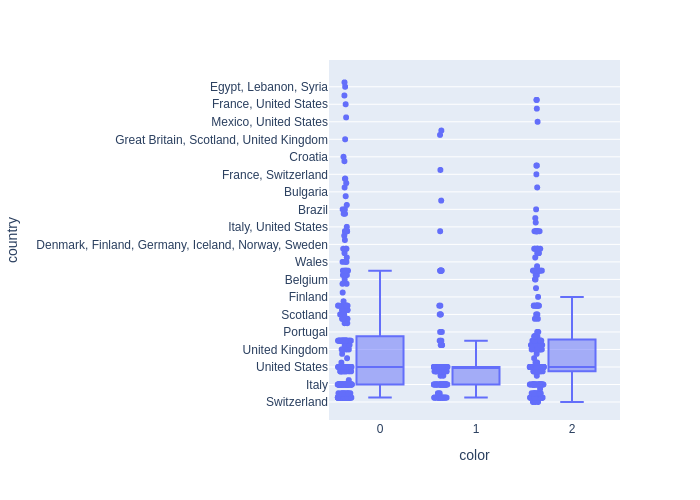

In [88]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv")

cheese_color_index = {
    "white": 0,
    "ivory": 1,
    "pale yellow": 2,
}

df = df[df['color'].notna()].copy()

df.loc[:, 'color'] = df['color'].map(cheese_color_index)

fig = px.box(df, y="country", x="color", points="all")
fig.show(renderer="png")


6. 
Using this information, we can see that in some arbitrary, strange, order in which I have received the countries from the dataset, there are a lot of cheeses from Switzerland, the UK, Netherlands, Sweden and the Czech Republic. As a result, they make up the majority of the cheeses.

However, we can also see that there are almost no ivory or pale yellow cheeses from Egypt, Lebanon or Syria, with the majority of their cheeses being white.

This was not necessarily an easy data set to get information out of, however, we can see through this that aside from the four or five nations making a ton of cheese, almost no cheese is ivory in colour.

8. I have zero clue how I intend to animate the cheese graph and am unsure if that is what was requested. As a result, I will be using the graph and data provided by plotly/the video.

In [89]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

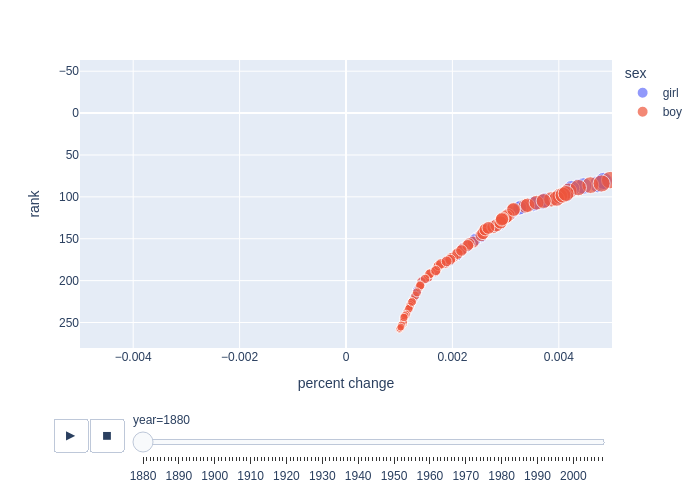

In [90]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name'] + " " + bn['sex']  # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # restrict to "common" names
fig = px.scatter(bn,
                 x="percent change",
                 y="rank",
                 size="percent",
                 color="sex",
                 animation_frame="year",
                 animation_group="name",
                 hover_name="name",
                 size_max=50,
                 range_x=[-0.005, 0.005])

fig.update_yaxes(autorange='reversed')
fig.show(renderer="png")


9. the chatbot saved me for this homework.